<h1>Bus resonator coupler</h1>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from qutip import *
from scipy.constants import e, hbar

from two_coupled_qubits import ChargeQubit, Resonator

In [2]:
q1 = ChargeQubit(e_c=0.23084, e_j=16.34, levels=1, n_g=0)
q2 = ChargeQubit(e_c=0.26084, e_j=16.34, levels=1, n_g=0)
r = Resonator(dim=5, w=7.50, c_r=368.440)

In [3]:
# Operators
b = destroy(r.dim)

# Free Hamiltonian
h0 = tensor(q1.h, q2.h, r.h)

# Interacting Hamiltonian
h1r = tensor(q1.number[1], qeye(q2.dim), (b - b.dag()))
h2r = tensor(qeye(q1.dim), q2.number[1], (b - b.dag()))
hint = h1r + h2r

# Total Hamiltonian
h = h0 + hint

In [4]:
# Eigenvectors
_, eigenvectors_q1 = q1.h.eigenstates()
_, eigenvectors_q2 = q2.h.eigenstates()
_, eigenvectors_r = r.h.eigenstates()

# States
psi = np.empty((q1.dim, q2.dim, r.dim), dtype=Qobj)

for i in range(q1.dim):
    for j in range(q2.dim):
        for k in range(r.dim):
            psi[i,j,k] = tensor(eigenvectors_q1[i], eigenvectors_q2[j], eigenvectors_r[k])

# Time
t_list = np.linspace(0, 20, 1000)

In [5]:
# Master Equation
result = mesolve(H=h, rho0=psi[1,0,0], tlist=t_list, c_ops=[], e_ops=[], args={})

In [6]:
# Expected value
prob = np.empty((q1.dim, q2.dim, r.dim), dtype=Qobj)

for i in range(q1.dim):
    for j in range(q2.dim):
        for k in range(r.dim):
            prob[i,j,k] = expect(psi[i,j,k]*psi[i,j,k].dag(), result.states)

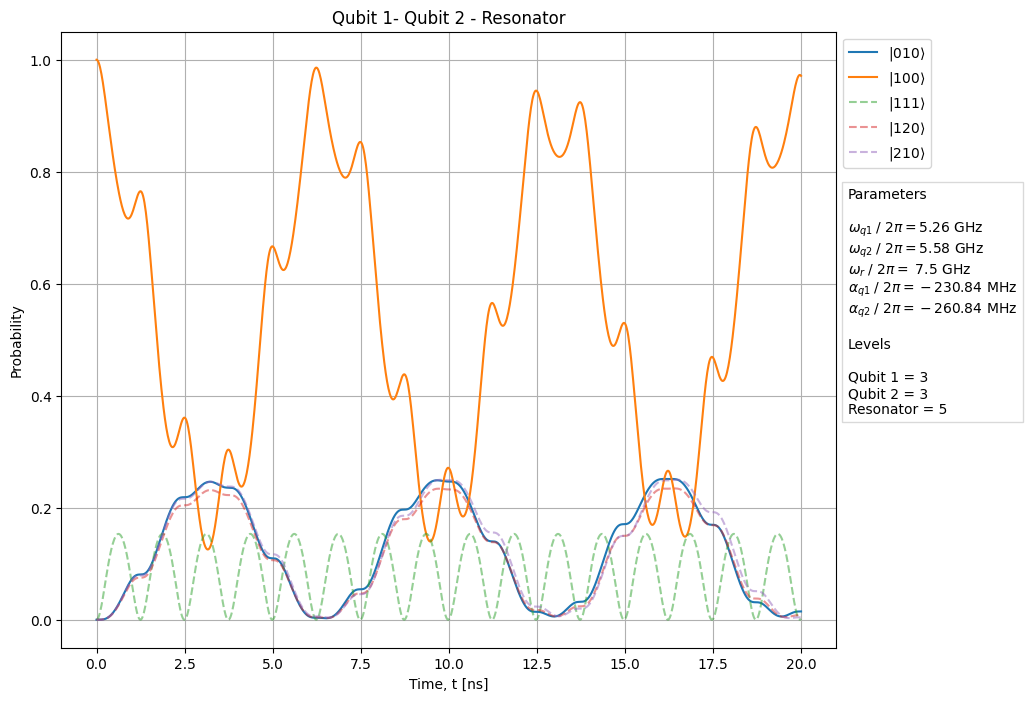

In [7]:
# Parameters
wq1 = round(q1.w / (2 * np.pi), 2)
wq2 = round(q2.w / (2 * np.pi), 2)
wr = round(r.w, 2)
alpha1 = round(q1.e_c * 1e3,2)
alpha2 = round(q2.e_c * 1e3,2)

# Plot
fig = plt.figure(figsize=(10,8))

for i in range(q1.dim):
    for j in range(q2.dim):
        for k in range(r.dim):
            if np.max(prob[i,j,k]) > 0.01:
                if (i,j,k) == (1,0,0) or (i,j,k) == (0,1,0):
                    plt.plot(t_list, prob[i,j,k], label=f"$|{i}{j}{k}\\rangle$")
                    continue
                plt.plot(t_list, prob[i,j,k], label=f"$|{i}{j}{k}\\rangle$", linestyle="--", alpha=0.5)

plt.ylabel("Probability")
plt.xlabel("Time, t [ns]")
plt.title("Qubit 1- Qubit 2 - Resonator")
plt.legend(bbox_to_anchor=(1.00, 1.00), loc='upper left')

text = f"""Parameters

$\\omega_{{q1\,\,}}/\,\,2\\pi = ${wq1} GHz
$\\omega_{{q2\,\,}}/\,\,2\\pi = ${wq2} GHz
$\\omega_{{r\,\,}}/\,\,2\\pi = $ {wr} GHz
$\\alpha_{{q1\,\,}}/\,\,2\\pi = - ${alpha1} MHz
$\\alpha_{{q2\,\,}}/\,\,2\\pi = - ${alpha2} MHz

Levels

Qubit 1 = {q1.dim}
Qubit 2 = {q2.dim}
Resonator = {r.dim}"""

plt.text(1.015, 0.38, text, fontsize=10, transform=plt.gca().transAxes,
         bbox=dict(facecolor='white', edgecolor='black', linewidth=1, alpha=0.15))
plt.grid()
plt.show()

In [8]:
q1 = ChargeQubit(e_c=0.23084, e_j=16.34, levels=1, n_g=0)
q2 = ChargeQubit(e_c=0.26084, e_j=16.34, levels=1, n_g=0)
r = Resonator(dim=5, w=7.50, c_r=368.440)

In [9]:
# Parameters
c_g = 19.46
beta_1 = c_g/(c_g + q1.c_s)
beta_2 = c_g/(c_g + q2.c_s)

# Operators
b = destroy(r.dim)

# Free Hamiltonian
h0 = tensor(q1.h, q2.h, r.h)

# Interacting Hamiltonian
h1r = tensor(- 1j * 2 * beta_1 * e * r.v_rms / hbar * 1e-9 * q1.number[1], qeye(q2.dim), (b - b.dag()))
h2r = tensor(qeye(q1.dim), - 1j * 2 * beta_2 * e * r.v_rms / hbar * 1e-9 * q2.number[1], (b - b.dag()))
hint = h1r + h2r

# Total Hamiltonian
h = h0 + hint

In [10]:
# Eigenvectors
_, eigenvectors_q1 = q1.h.eigenstates()
_, eigenvectors_q2 = q2.h.eigenstates()
_, eigenvectors_r = r.h.eigenstates()

# States
psi = np.empty((q1.dim, q2.dim, r.dim), dtype=Qobj)

for i in range(q1.dim):
    for j in range(q2.dim):
        for k in range(r.dim):
            psi[i,j,k] = tensor(eigenvectors_q1[i], eigenvectors_q2[j], eigenvectors_r[k])

# Time
t_list = np.linspace(0, 20, 1000)

In [11]:
# Master Equation
result = mesolve(H=h, rho0=psi[1,0,0], tlist=t_list, c_ops=[], e_ops=[], args={})

In [12]:
# Expected value
prob = np.empty((q1.dim, q2.dim, r.dim), dtype=Qobj)

for i in range(q1.dim):
    for j in range(q2.dim):
        for k in range(r.dim):
            prob[i,j,k] = expect(psi[i,j,k]*psi[i,j,k].dag(), result.states)

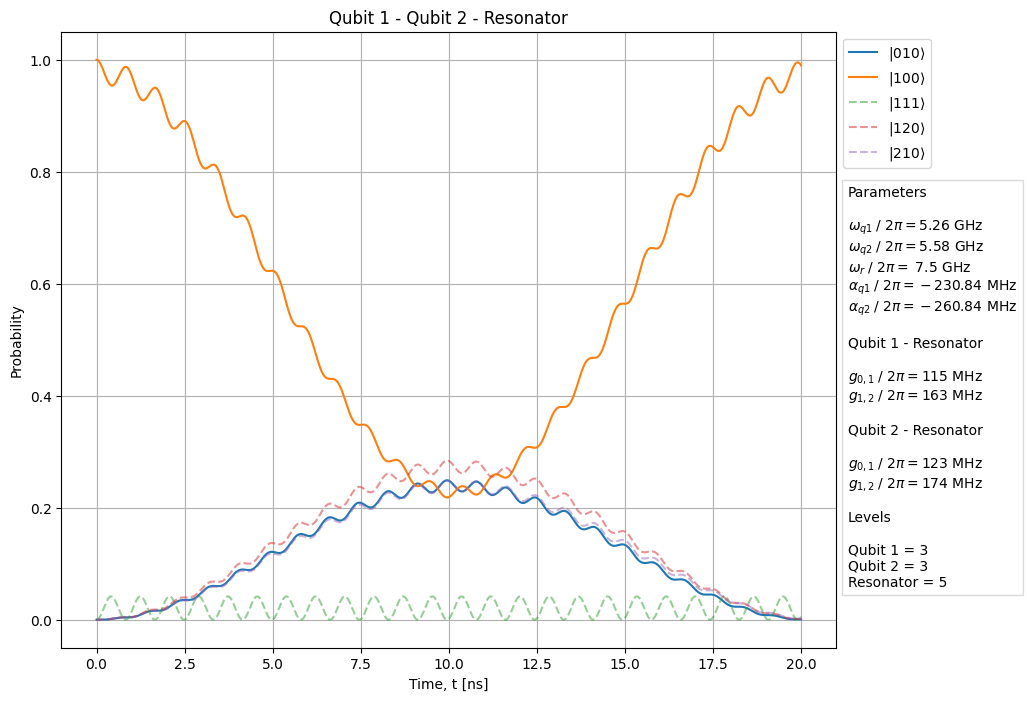

In [13]:
# Parameters
wq1 = round(q1.w / (2 * np.pi), 2)
wq2 = round(q2.w / (2 * np.pi), 2)
wr = round(r.w, 2)
alpha1 = round(q1.e_c * 1e3,2)
alpha2 = round(q2.e_c * 1e3,2)
g1_01 = round(2*beta_1*e*r.v_rms/hbar*(q1.e_j / (32 * q1.e_c)) ** (1 / 4)/(2*np.pi)*1e-6)
g1_12 = round(np.sqrt(2)*2*beta_1*e*r.v_rms/hbar*(q1.e_j / (32 * q1.e_c)) ** (1 / 4)/(2*np.pi)*1e-6)
g2_01 = round(2*beta_2*e*r.v_rms/hbar*(q2.e_j / (32 * q2.e_c)) ** (1 / 4)/(2*np.pi)*1e-6)
g2_12 = round(np.sqrt(2)*2*beta_2*e*r.v_rms/hbar*(q2.e_j / (32 * q2.e_c)) ** (1 / 4)/(2*np.pi)*1e-6)

# Plot
fig = plt.figure(figsize=(10,8))

for i in range(q1.dim):
    for j in range(q2.dim):
        for k in range(r.dim):
            if np.max(prob[i,j,k]) > 0.01:
                if (i,j,k) == (1,0,0) or (i,j,k) == (0,1,0):
                    plt.plot(t_list, prob[i,j,k], label=f"$|{i}{j}{k}\\rangle$")
                    continue
                plt.plot(t_list, prob[i,j,k], label=f"$|{i}{j}{k}\\rangle$", linestyle="--", alpha=0.5)

plt.ylabel("Probability")
plt.xlabel("Time, t [ns]")
plt.title("Qubit 1 - Qubit 2 - Resonator")
plt.legend(bbox_to_anchor=(1.00, 1.00), loc='upper left')

text = f"""Parameters

$\\omega_{{q1\,\,}}/\,\,2\\pi = ${wq1} GHz
$\\omega_{{q2\,\,}}/\,\,2\\pi = ${wq2} GHz
$\\omega_{{r\,\,}}/\,\,2\\pi = $ {wr} GHz
$\\alpha_{{q1\,\,}}/\,\,2\\pi = - ${alpha1} MHz
$\\alpha_{{q2\,\,}}/\,\,2\\pi = - ${alpha2} MHz

Qubit 1 - Resonator

$g_{{0,1\,\,}}/\,\,2\\pi = ${g1_01} MHz
$g_{{1,2\,\,}}/\,\,2\\pi = ${g1_12} MHz

Qubit 2 - Resonator

$g_{{0,1\,\,}}/\,\,2\\pi = ${g2_01} MHz
$g_{{1,2\,\,}}/\,\,2\\pi = ${g2_12} MHz

Levels

Qubit 1 = {q1.dim}
Qubit 2 = {q2.dim}
Resonator = {r.dim}"""

plt.text(1.015, 0.1, text, fontsize=10, transform=plt.gca().transAxes,
         bbox=dict(facecolor='white', edgecolor='black', linewidth=1, alpha=0.15))

plt.grid()
plt.show()